# Assignment 2: Cohort characterisation and clustering

To begin, load the given dataset and examine the first few rows. This will give us an idea of the data structure and variables accessible.

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer

In [2]:
# Load dataset
df_hypotension = pd.read_csv(r"C:\Users\yamin\Downloads\hypotension_patients.csv")

# Display the first few rows of the dataset
df_hypotension.head()

,ID,anchor_age,gender,dod,apsiii,LoS,charlson_comorbidity_index
0,1,80,F,NaN,56,7.00,4
1,2,72,F,2137-09-02,49,12.92,6
2,3,82,M,2144-06-18,46,13.13,5
3,4,89,F,2155-12-07,86,4.92,7
4,5,69,F,2136-05-12,102,11.46,8


1. We'll present summary data for these columns and visualise their distributions to explain the major aspects of the profound hypotension cohort.

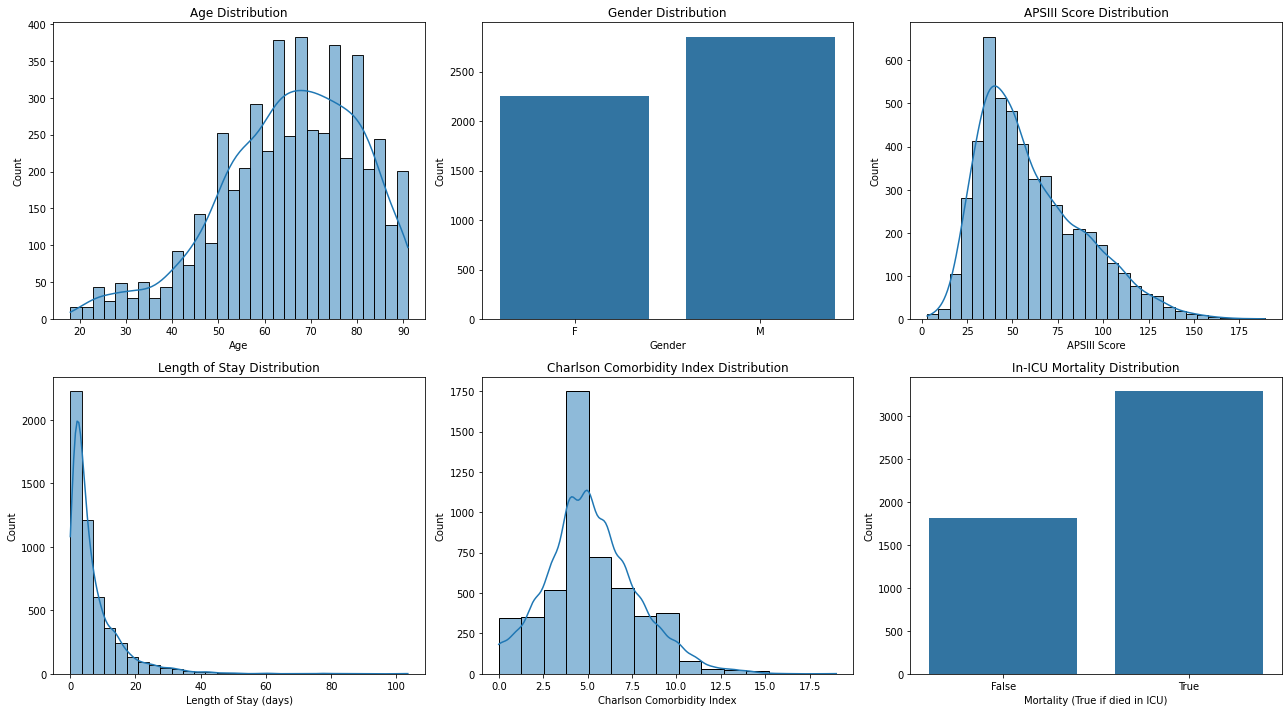

,ID,anchor_age,gender,dod,apsiii,LoS,charlson_comorbidity_index
count,5106.000000,5106.000000,5106,3290,5106.000000,5106.000000,5106.00000
unique,NaN,NaN,2,3114,NaN,NaN,NaN
top,NaN,NaN,M,2175-03-02,NaN,NaN,NaN
freq,NaN,NaN,2853,3,NaN,NaN,NaN
mean,2553.500000,65.552683,NaN,NaN,60.314532,7.053651,5.21700
std,1474.119568,15.235907,NaN,NaN,28.860171,8.432716,2.57691
min,1.000000,18.000000,NaN,NaN,3.000000,0.040000,0.00000
25%,1277.250000,56.000000,NaN,NaN,38.000000,1.960000,4.00000
50%,2553.500000,67.000000,NaN,NaN,53.000000,4.130000,5.00000
75%,3829.750000,77.000000,NaN,NaN,78.000000,8.960000,7.00000


In [3]:
# statistics summary
stats_summary = df_hypotension.describe(include='all')

# Visualizations
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10))

# Age distribution
sns.histplot(df_hypotension['anchor_age'], bins=30, ax=axes[0, 0], kde=True)
axes[0, 0].set_title('Age Distribution')
axes[0, 0].set_xlabel('Age')
axes[0, 0].set_ylabel('Count')

# Gender distribution
sns.countplot(x='gender', data=df_hypotension, ax=axes[0, 1])
axes[0, 1].set_title('Gender Distribution')
axes[0, 1].set_xlabel('Gender')
axes[0, 1].set_ylabel('Count')

# APSIII distribution
sns.histplot(df_hypotension['apsiii'], bins=30, ax=axes[0, 2], kde=True)
axes[0, 2].set_title('APSIII Score Distribution')
axes[0, 2].set_xlabel('APSIII Score')
axes[0, 2].set_ylabel('Count')

# Length of Stay distribution
sns.histplot(df_hypotension['LoS'], bins=30, ax=axes[1, 0], kde=True)
axes[1, 0].set_title('Length of Stay Distribution')
axes[1, 0].set_xlabel('Length of Stay (days)')
axes[1, 0].set_ylabel('Count')

# Charlson Comorbidity Index distribution
sns.histplot(df_hypotension['charlson_comorbidity_index'], bins=15, ax=axes[1, 1], kde=True)
axes[1, 1].set_title('Charlson Comorbidity Index Distribution')
axes[1, 1].set_xlabel('Charlson Comorbidity Index')
axes[1, 1].set_ylabel('Count')

# Mortality distribution (in-ICU mortality)
df_hypotension['mortality'] = ~df_hypotension['dod'].isna()
sns.countplot(x='mortality', data=df_hypotension, ax=axes[1, 2])
axes[1, 2].set_title('In-ICU Mortality Distribution')
axes[1, 2].set_xlabel('Mortality (True if died in ICU)')
axes[1, 2].set_ylabel('Count')

plt.tight_layout()
plt.show()

stats_summary


Based on the summary data and visualisations, the following are the major characteristics of the profound hypotension cohort:

1.Age:
-Patients range in age from 18 to 91 years.
-The median age is 67 years old, with a mean of around 65.55 years old.
-The majority of patients are between the ages of 50 and 80.

2.Gender:
-The cohort is made up of more men (2,853) than women (2,253).

3.Acute Physiology Score III (APSIII):
-The APSIII scale ranges from 3 to 189.
-The median APSIII score is 53, with a mean of around 60.31.

4.LoS (Length of Stay):
-The length of stay in the ICU ranges from 0.04 to 103.5 days.
-The average length of stay is around 7.05 days, with a median of roughly 4.13 days.

5.Comorbidity Index Charlson:
-The index values vary between 0 and 19.
-The median index value is 5, with a mean of around 5.22.

6.Mortality in the ICU:
-Three thousand two hundred of the 5,106 patients have a reported date of death, suggesting that they died during their ICU hospitalisation. This shows that this group has a significant death rate.

These visualisations and data provide us with a thorough understanding of the patient cohort's characteristics. The following stage would be to go further into the data to uncover patterns and clusters.

2. To execute k-means clustering, we must first preprocess the data as follows:

-Handle missing values: If required, we will impute missing values.
-Feature selection: Because "ID" and "dod" are identifiers and derived features, we shall eliminate them from clustering.
-Scaling: Because K-means is sensitive to data scale, we must verify that all features are on a comparable scale.

Following preprocessing, we will compute and visualise the sum of squared distances over a range of cluster numbers to find the "elbow." The curve's "elbow" reflects an ideal value for k (a trade-off between precision and computational cost).

C:\Users\yamin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\yamin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\yamin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\yamin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of

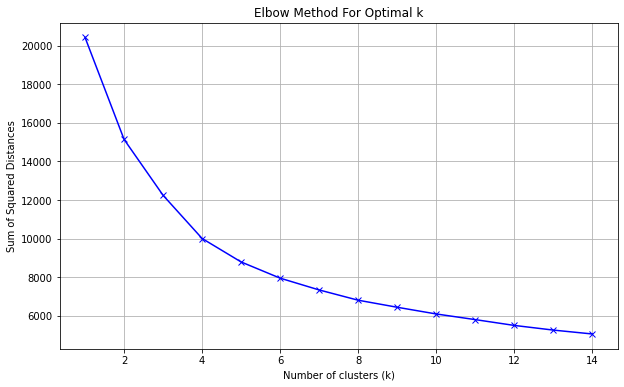

In [4]:
# Columns to be used for clustering
features = ['anchor_age', 'apsiii', 'LoS', 'charlson_comorbidity_index']

# Extract relevant features
X = df_hypotension[features].copy()

# Impute missing values with median
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Compute sum of squared distances for a range of cluster numbers
sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km = km.fit(X_scaled)
    sum_of_squared_distances.append(km.inertia_)

# Plotting the elbow graph
plt.figure(figsize=(10,6))
plt.plot(K, sum_of_squared_distances, 'bx-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Sum of Squared Distances')
plt.title('Elbow Method For Optimal k')
plt.grid(True)
plt.show()


The "elbow" approach is charting the sum of squared distances for a range of cluster numbers and searching for a point where the rate of reduction abruptly changes, suggesting a "elbow."

The plot shows that the rate of reduction of the sum of squared distances begins to stall at k=3 and k=4. While there is no clear "elbow," these places appear to be plausible selections based on the curve.

To defend our choice, at k=3, we investigate a more comprehensive grouping of the patients, perhaps discovering larger subphenotypes.
At k=4, we enable the clustering algorithm to select a more detailed grouping, which may capture subtler distinctions between the patients.
Finally, based on the elbow criteria and the heuristic character of the technique, we will choose two values for k=3 and k=4 for further analysis.

3. Let us now move on to the clustering analysis and visualisation to better understand the primary property differences between the clusters and their relevance to patient outcomes.
we will use k-means clustering for k=3 and k=4.
We'll investigate the qualities of each cluster by visualising the feature distribution.
We'll look at the link between the clusters and patient outcomes (ICU mortality).

C:\Users\yamin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


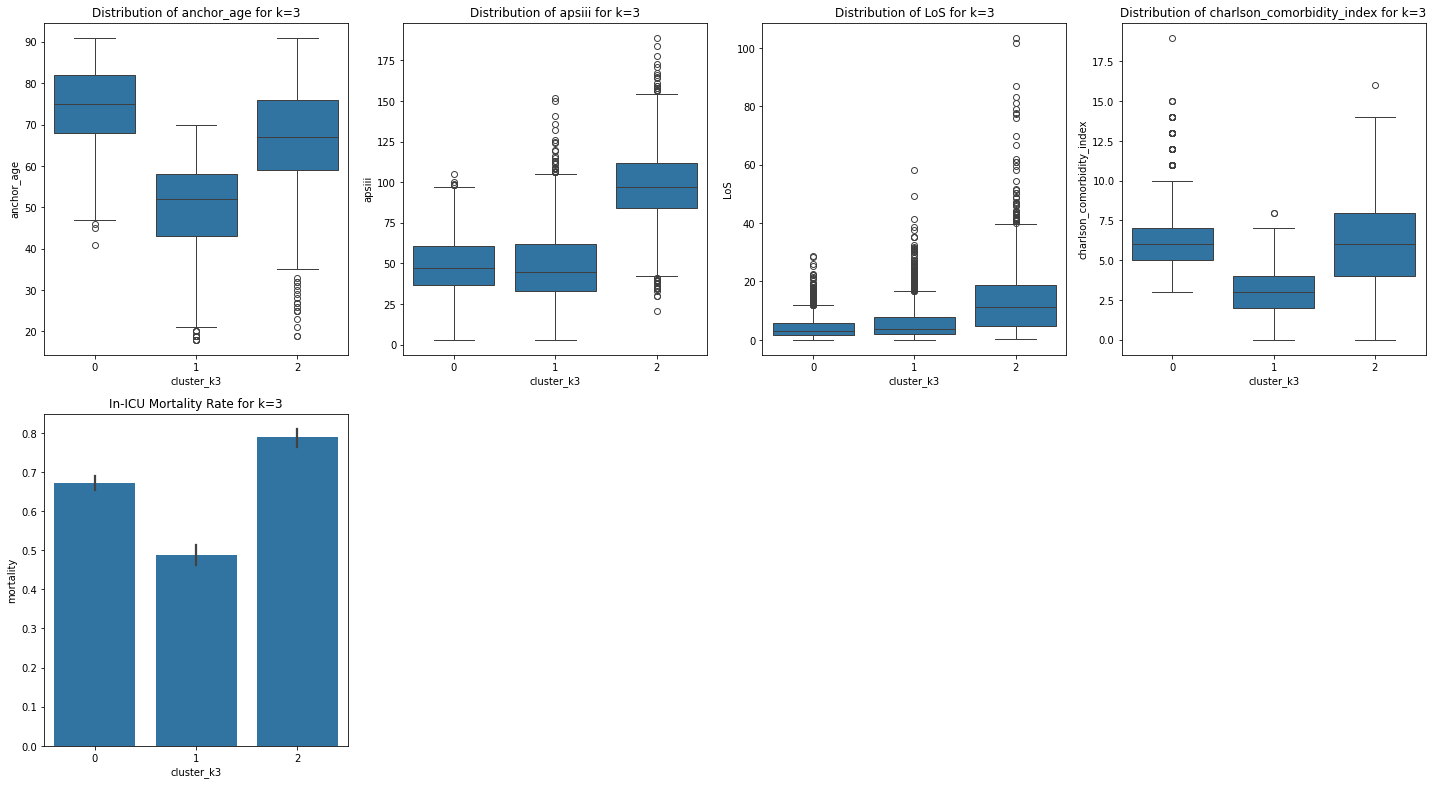

In [5]:
# for k=3 k-means clustering
km_3 = KMeans(n_clusters=3, random_state=42)
df_hypotension["cluster_k3"] = km_3.fit_predict(X_scaled)

# the properties of clusters for k=3 is visualized
plt.figure(figsize=(20, 16))

#  across clusters (k=3) Visualizing distributions of features
for idx, feature in enumerate(features, 1):
    plt.subplot(3, 4, idx)
    sns.boxplot(x="cluster_k3", y=feature, data=df_hypotension)
    plt.title(f"Distribution of {feature} for k=3")

#  for clusters (k=3) Visualizing in-ICU mortality rates
plt.subplot(3, 4, 5)
sns.barplot(x="cluster_k3", y="mortality", data=df_hypotension)
plt.title("In-ICU Mortality Rate for k=3")

plt.tight_layout()
plt.show()


Based on the visualisations, let us explore the qualities and differences of the clusters for k=3:

Age ('anchor_age'): 
Cluster 0 has younger patients than the other clusters.
Cluster 1 patients range in age from middle-aged to elderly, with a median age that is greater than Cluster 0 but lower than Cluster 2.
Cluster 2 is primarily made up of elderly individuals.

APSIII Score ('apsiii'): 
Cluster 0 has the lowest median APSIII scores, suggesting that the disease is less severe on average.
Clusters 1 and 2 have better APSIII scores, with Cluster 2 having slightly higher total scores.

LoS (Length of Stay):
The median duration of stay is comparable throughout the groups, however Cluster 2 has a broader range, indicating higher variability in ICU stays for patients in this cluster.

Comorbidity Index Charlson:
Cluster 0 has the lowest comorbidity index on average.
Clusters 1 and 2 have a higher comorbidity score, indicating that they have more underlying health issues. Cluster 2 has a somewhat higher median than Cluster 1.

Mortality in the ICU:
Cluster 0 has the lowest risk of in-ICU mortality.
Clusters 1 and 2 have greater death rates, with Cluster 2 having the highest mortality rate of all.

Conclusions:
Cluster 0 individuals are younger, have a lower degree of disease, and have fewer comorbidities. As a result, they have the lowest in-ICU mortality rate.
Cluster 1 is made up of individuals ranging in age from middle-aged to elderly and suffering from mild sickness severity.
Cluster 2 is made up of elderly individuals who have a more severe disease and more comorbidities. This cluster also had the greatest fatality rate, which is consistent with their advanced age and severity of sickness.

Let us visualise the cluster attributes for k=4 and examine their characteristics and link to patient outcomes.

C:\Users\yamin\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


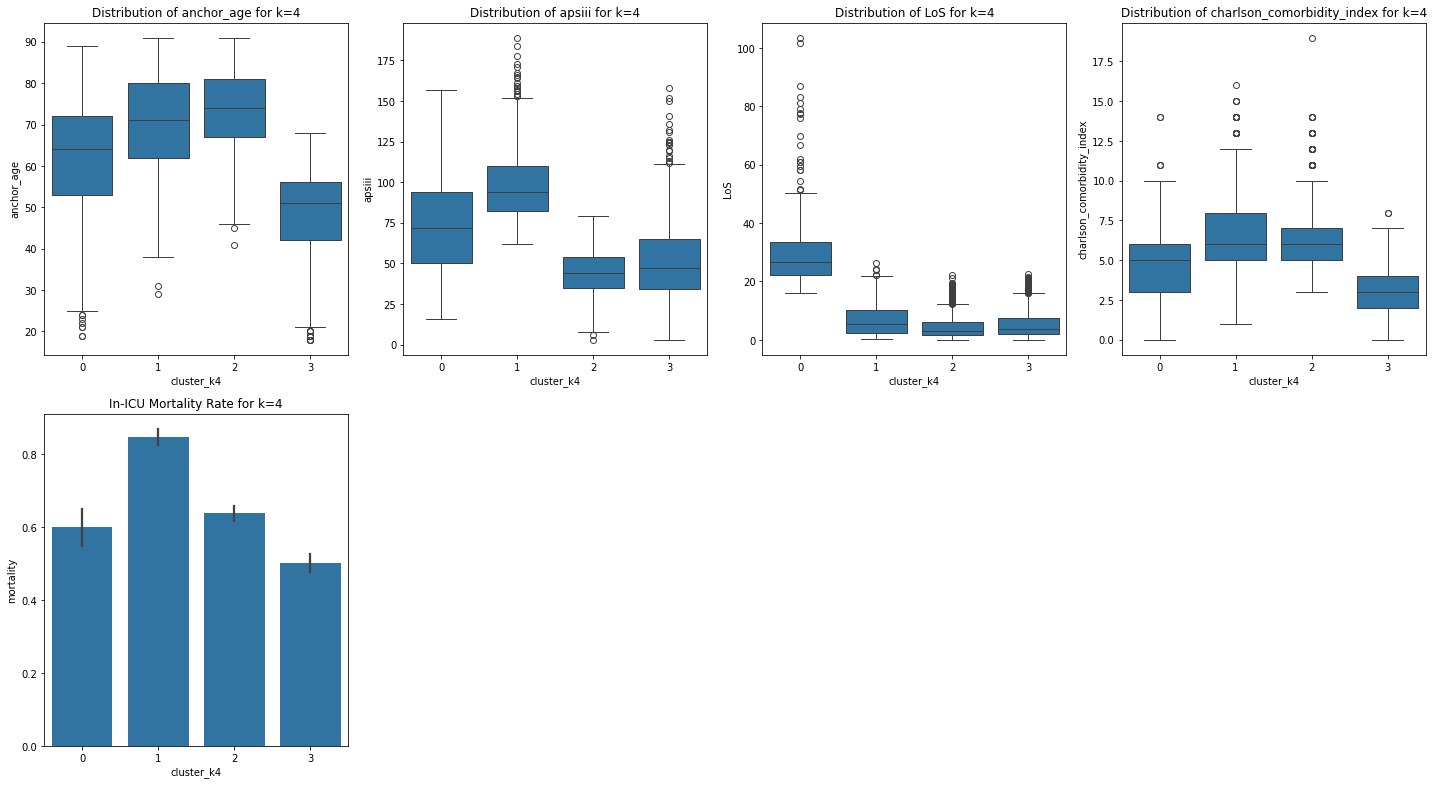

In [6]:
#  features and target
features = ['anchor_age', 'apsiii', 'LoS', 'charlson_comorbidity_index']

# Impute missing values with median
imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(df_hypotension[features])

# Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Perform k-means clustering for k=4
km_4 = KMeans(n_clusters=4, random_state=42)
df_hypotension["cluster_k4"] = km_4.fit_predict(X_scaled)

#  for k=4 Visualizing the properties of clusters
plt.figure(figsize=(20, 16))

#  across clusters (k=4) Visualizing distributions of features
for idx, feature in enumerate(features, 1):
    plt.subplot(3, 4, idx)
    sns.boxplot(x="cluster_k4", y=feature, data=df_hypotension)
    plt.title(f"Distribution of {feature} for k=4")

#  for clusters (k=4) Visualizing in-ICU mortality rates
plt.subplot(3, 4, 5)
df_hypotension['mortality'] = ~df_hypotension['dod'].isna()
sns.barplot(x="cluster_k4", y="mortality", data=df_hypotension)
plt.title("In-ICU Mortality Rate for k=4")

plt.tight_layout()
plt.show()


The k=4 cluster visualisations reveal the following:

Age (anchor_age): 
Patients in Cluster 0 are mostly older.
Cluster 1 is primarily composed of patients in their forties and fifties.
Patients in Cluster 2 are younger.
Cluster 3 contains a diverse range of ages, with an emphasis on the elderly.

APSIII Score (apsiii): 
Clusters 0 and 3 have higher APSIII scores, suggesting that the sickness is more severe.
APSIII scores are lower in Clusters 1 and 2.

duration of Stay (LoS): 
The median duration of stay is comparable among clusters. Cluster 0 has a wider range of results, implying higher variability in ICU stays.

Comorbidity Index Charlson:
Clusters 0 and 3 had greater comorbidity indices, indicating that they have more underlying health issues.
Comorbidity scores are lower in Clusters 1 and 2.

Mortality in the ICU:
Cluster 0 has the greatest risk of mortality.
Clusters 1 and 2 had much lower death rates.
Cluster 3 has a somewhat greater mortality rate than Clusters 1 and 2, although it is lower than Cluster 0.

Conclusions:
Cluster 0 individuals are elderly patients who have a more severe disease, more comorbidities, and the greatest fatality rate.
Cluster 1 patients are middle-aged with mild severity and fewer comorbidities.
Cluster 2 consists primarily of younger individuals with lesser severity and fewer underlying medical issues.
Cluster 3 is a heterogeneous group that tends to be older, with a high degree of disease and comorbidities and a high death rate.
These clusters, notably Cluster 0, imply that older age, greater disease severity, and more comorbidities are associated with increased in-ICU death rates. The data sheds light on potential risk factors and can aid in personalising therapies to specific patient subgroups.